##**NAME -** RUPAYAN GHOSH
##**ROLL NO.** - 001811001015
##**MACHINE LEARNING LAB ASSIGNMENT 2**

#Import required modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#Load Dataset

In [ ]:
b_cancer = datasets.load_breast_cancer() # it's source is same as : https://archive.ics.uci.edu/ml/datasets/wine

In [ ]:
dir(b_cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
b_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
print(b_cancer.feature_names)
print(b_cancer.target_names)
print(b_cancer.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 

In [ ]:
df = pd.DataFrame(data=b_cancer.data, columns=b_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df["target"] = b_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

#DataFrame ready to perform

In [ ]:
len(df)

569

In [ ]:
X = df.drop(["target"], axis="columns")
y = df.target
print(X.head())
print(y.head())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


#SVC Classfier

##Linear SVC Classifier



In [ ]:
linear_SVC_classifier = SVC(kernel='linear')
linear_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.90643274853801%

Confusion Matrix:

[[ 61   2]
 [  5 103]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



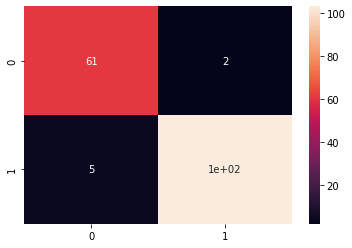

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.36842105263158%

Confusion Matrix:
[[ 80   3]
 [  3 142]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.98      0.98      0.98       145

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



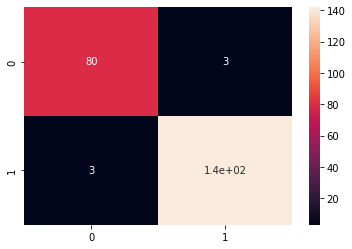

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.78947368421052%

Confusion Matrix:
[[ 95   6]
 [  6 178]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       101
           1       0.97      0.97      0.97       184

    accuracy                           0.96       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.96      0.96      0.96       285



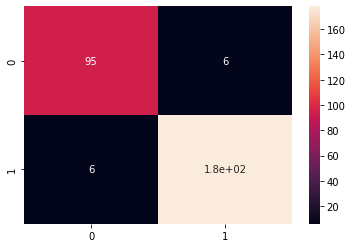

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.90643274853801%

Confusion Matrix:

[[118   5]
 [  9 210]]

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       123
           1       0.98      0.96      0.97       219

    accuracy                           0.96       342
   macro avg       0.95      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342



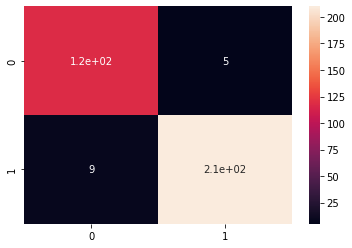

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.48872180451127%

Confusion Matrix:

[[137   9]
 [  9 244]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.96      0.96      0.96       253

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



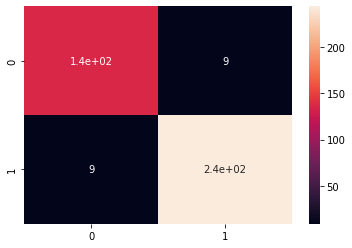

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Polynomial SVC Classifier

In [ ]:
poly_SVC_classifier = SVC(kernel='poly')
poly_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 91.81286549707602%

Confusion Matrix:
 [[ 51  12]
 [  2 106]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        63
           1       0.90      0.98      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



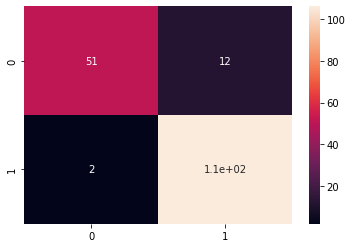

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 91.66666666666666%

Confusion Matrix:
 [[ 65  18]
 [  1 144]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.78      0.87        83
           1       0.89      0.99      0.94       145

    accuracy                           0.92       228
   macro avg       0.94      0.89      0.91       228
weighted avg       0.92      0.92      0.91       228



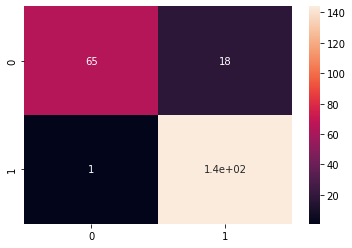

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 90.87719298245615%

Confusion Matrix:
 [[ 77  24]
 [  2 182]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.76      0.86       101
           1       0.88      0.99      0.93       184

    accuracy                           0.91       285
   macro avg       0.93      0.88      0.89       285
weighted avg       0.92      0.91      0.91       285



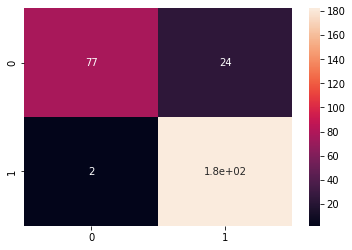

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 90.05847953216374%

Confusion Matrix:
 [[ 94  29]
 [  5 214]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       123
           1       0.88      0.98      0.93       219

    accuracy                           0.90       342
   macro avg       0.92      0.87      0.89       342
weighted avg       0.91      0.90      0.90       342



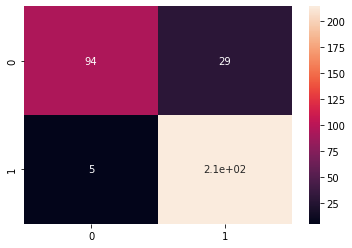

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 89.72431077694235%

Confusion Matrix:
 [[108  38]
 [  3 250]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       146
           1       0.87      0.99      0.92       253

    accuracy                           0.90       399
   macro avg       0.92      0.86      0.88       399
weighted avg       0.91      0.90      0.89       399



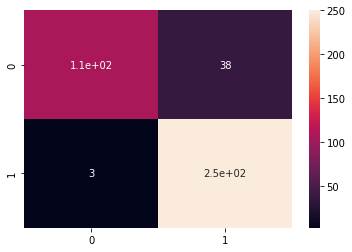

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Gaussain SVC Classifier

In [ ]:
gaussain_SVC_classifier = SVC(kernel='rbf')
gaussain_SVC_classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.39766081871345%

Confusion Matrix:
 [[ 51  12]
 [  1 107]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



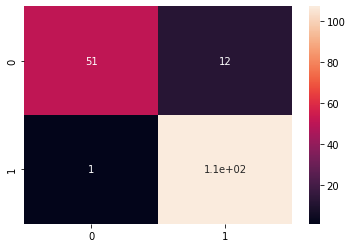

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.10526315789474%

Confusion Matrix:
 [[ 66  17]
 [  1 144]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.80      0.88        83
           1       0.89      0.99      0.94       145

    accuracy                           0.92       228
   macro avg       0.94      0.89      0.91       228
weighted avg       0.93      0.92      0.92       228



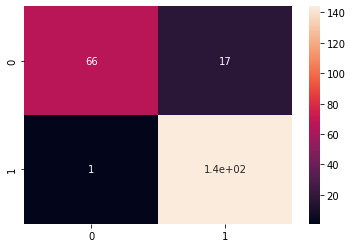

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 91.57894736842105%

Confusion Matrix:
 [[ 78  23]
 [  1 183]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       101
           1       0.89      0.99      0.94       184

    accuracy                           0.92       285
   macro avg       0.94      0.88      0.90       285
weighted avg       0.92      0.92      0.91       285



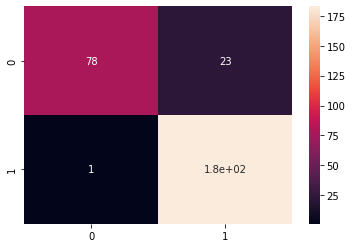

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 90.64327485380117%

Confusion Matrix:
 [[ 94  29]
 [  3 216]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       123
           1       0.88      0.99      0.93       219

    accuracy                           0.91       342
   macro avg       0.93      0.88      0.89       342
weighted avg       0.91      0.91      0.90       342



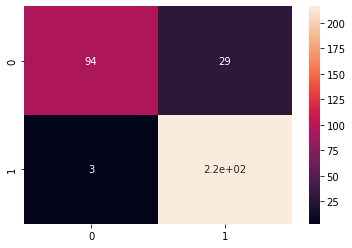

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 90.47619047619048%

Confusion Matrix:
 [[110  36]
 [  2 251]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       146
           1       0.87      0.99      0.93       253

    accuracy                           0.90       399
   macro avg       0.93      0.87      0.89       399
weighted avg       0.91      0.90      0.90       399



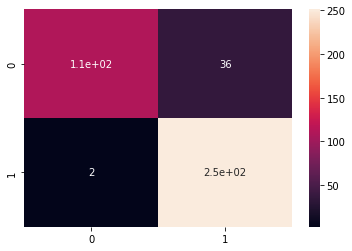

In [ ]:
sns.heatmap(cf_matrix, annot=True)

##Sigmoid SVC Classifier

In [ ]:
sigmoid_SVC_classifier = SVC(kernel='sigmoid', C=0.9)
sigmoid_SVC_classifier

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###train size : test size = 70% : 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 46.198830409356724%

Confusion Matrix:
 [[10 53]
 [39 69]]

Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.16      0.18        63
           1       0.57      0.64      0.60       108

    accuracy                           0.46       171
   macro avg       0.38      0.40      0.39       171
weighted avg       0.43      0.46      0.44       171



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['sigmoid']}

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[[  0  63]
 [  0 108]]


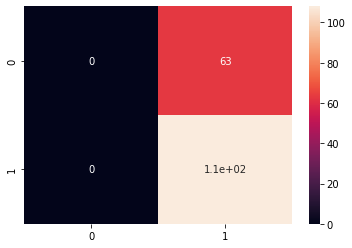

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171

Accuracy Score of RBF kernel 0.631578947368421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

import matplotlib.pyplot as plt
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
plt.show(sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True))
print(classification_report(y_test,grid_predictions))
print("Accuracy Score of RBF kernel", accuracy_score(y_test,grid_predictions))

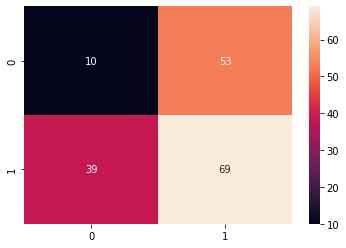

In [ ]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 47.80701754385965%

Confusion Matrix:
 [[15 68]
 [51 94]]

Classification Report:

              precision    recall  f1-score   support

           0       0.23      0.18      0.20        83
           1       0.58      0.65      0.61       145

    accuracy                           0.48       228
   macro avg       0.40      0.41      0.41       228
weighted avg       0.45      0.48      0.46       228



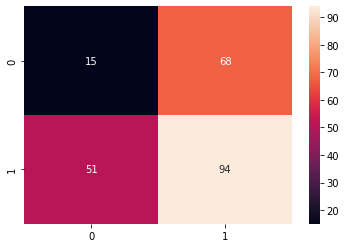

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 46.666666666666664%

Confusion Matrix:
 [[ 24  77]
 [ 75 109]]

Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.24      0.24       101
           1       0.59      0.59      0.59       184

    accuracy                           0.47       285
   macro avg       0.41      0.42      0.41       285
weighted avg       0.46      0.47      0.47       285



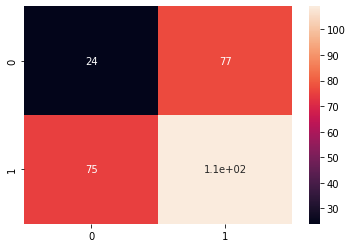

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 50.29239766081871%

Confusion Matrix:
 [[ 36  87]
 [ 83 136]]

Classification Report:

              precision    recall  f1-score   support

           0       0.30      0.29      0.30       123
           1       0.61      0.62      0.62       219

    accuracy                           0.50       342
   macro avg       0.46      0.46      0.46       342
weighted avg       0.50      0.50      0.50       342



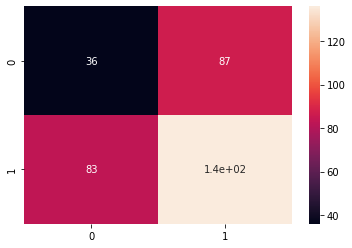

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 50.37593984962406%

Confusion Matrix:
 [[ 43 103]
 [ 95 158]]

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.29      0.30       146
           1       0.61      0.62      0.61       253

    accuracy                           0.50       399
   macro avg       0.46      0.46      0.46       399
weighted avg       0.50      0.50      0.50       399



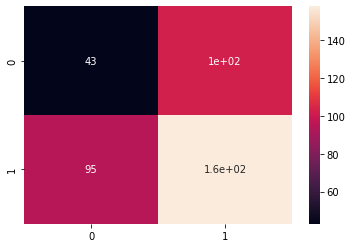

In [ ]:
sns.heatmap(cf_matrix, annot=True)

#MLP Classifier

In [ ]:
mlp_classifier = MLPClassifier(learning_rate='constant', max_iter=600)
mlp_classifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.32163742690058%

Confusion Matrix:

[[ 58   5]
 [  3 105]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



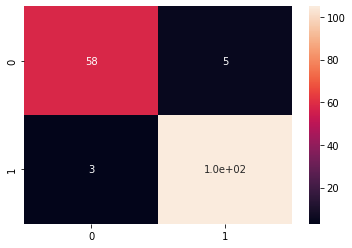

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.49122807017544%

Confusion Matrix:
[[ 76   7]
 [  1 144]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        83
           1       0.95      0.99      0.97       145

    accuracy                           0.96       228
   macro avg       0.97      0.95      0.96       228
weighted avg       0.97      0.96      0.96       228



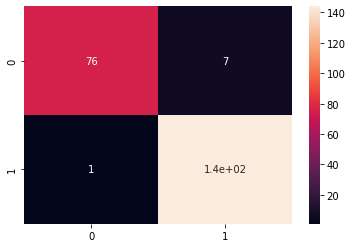

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.38596491228071%

Confusion Matrix:
[[ 92   9]
 [  7 177]]

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       101
           1       0.95      0.96      0.96       184

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



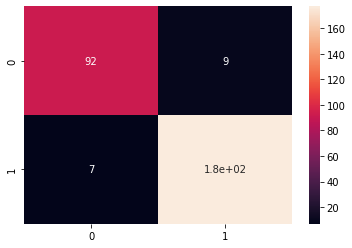

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 91.81286549707602%

Confusion Matrix:

[[ 99  24]
 [  4 215]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       123
           1       0.90      0.98      0.94       219

    accuracy                           0.92       342
   macro avg       0.93      0.89      0.91       342
weighted avg       0.92      0.92      0.92       342



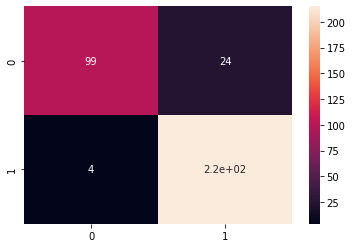

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 36.59147869674185%

Confusion Matrix:

[[146   0]
 [253   0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.37      1.00      0.54       146
           1       0.00      0.00      0.00       253

    accuracy                           0.37       399
   macro avg       0.18      0.50      0.27       399
weighted avg       0.13      0.37      0.20       399



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


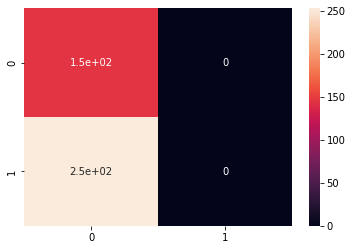

In [ ]:
sns.heatmap(cf_matrix, annot=True)

#Random Forest Classifier

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators=20)
rfc_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###train size : test size = 70% : 30%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

398
171


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.90643274853801%

Confusion Matrix:

[[ 61   2]
 [  5 103]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



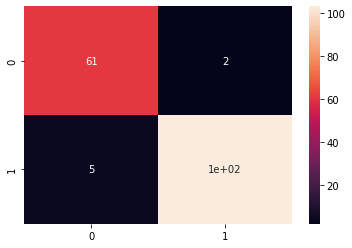

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

341
228


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.05263157894737%

Confusion Matrix:
[[ 77   6]
 [  3 142]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        83
           1       0.96      0.98      0.97       145

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.96       228
weighted avg       0.96      0.96      0.96       228



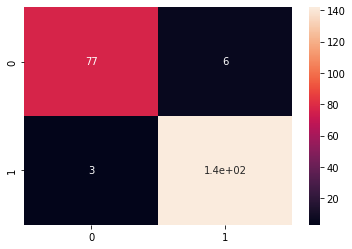

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [ ]:
print(len(X_train))
print(len(y_test))

284
285


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.08771929824562%

Confusion Matrix:
[[ 96   5]
 [  9 175]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       0.97      0.95      0.96       184

    accuracy                           0.95       285
   macro avg       0.94      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



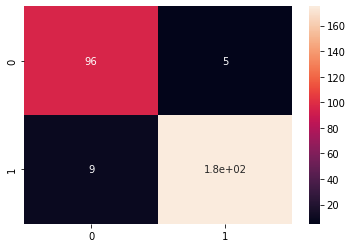

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

227
342


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.15204678362574%

Confusion Matrix:

[[114   9]
 [ 11 208]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       123
           1       0.96      0.95      0.95       219

    accuracy                           0.94       342
   macro avg       0.94      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342



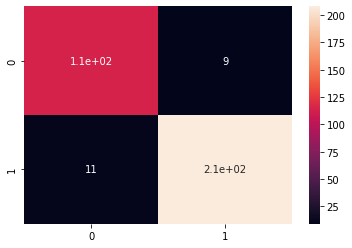

In [ ]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [ ]:
print(len(X_train))
print(len(y_test))

170
399


In [ ]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.23558897243107%

Confusion Matrix:

[[130  16]
 [  7 246]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       146
           1       0.94      0.97      0.96       253

    accuracy                           0.94       399
   macro avg       0.94      0.93      0.94       399
weighted avg       0.94      0.94      0.94       399



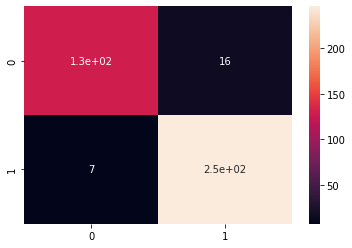

In [ ]:
sns.heatmap(cf_matrix, annot=True)